## Mall Customers Clustering Analysis 

## Importing the libraries

In [99]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

## Import the dataset
https://www.kaggle.com/shwetabh123/mall-customers

In [100]:
dataset = pd.read_csv('C:/Users/binayak/Videos/Machine Learning/Clustering/K Means/Mall_customers.csv')

In [101]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


There is not a dependent variable apriori when doing K Means clustering. Here all the colomns represent features which will be used to find patterns in the data. these patterns are actually clusters or segments in data which will be gathered by similarities.

## Encoding the Genre 

In [103]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],
                       remainder='passthrough')

In [104]:
X = dataset.iloc[:,1:].values

In [105]:
X[:5]

array([['Male', 19, 15, 39],
       ['Male', 21, 15, 81],
       ['Female', 20, 16, 6],
       ['Female', 23, 16, 77],
       ['Female', 31, 17, 40]], dtype=object)

## Encoding the Genre 

In [106]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],
                       remainder='passthrough')

In [107]:
X= np.array(ct.fit_transform(X))

In [108]:
X[:5]

array([[0.0, 1.0, 19, 15, 39],
       [0.0, 1.0, 21, 15, 81],
       [1.0, 0.0, 20, 16, 6],
       [1.0, 0.0, 23, 16, 77],
       [1.0, 0.0, 31, 17, 40]], dtype=object)

## Using the Elbow method to find the optimal number of clusters 

In [109]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

[35.5923852151125, 30.12687389411267, 24.027095389646494, 20.483981569840704, 17.781642339642055, 15.458460081540505, 14.579172608566987, 13.838315298685568, 13.12563443481068, 12.590145497455248]


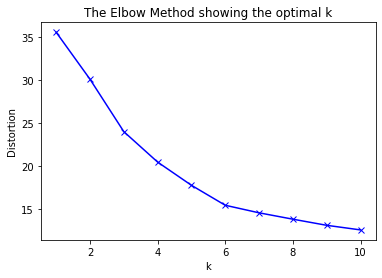

In [110]:
# k means determine k
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++')
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
print(distortions)
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### OR

[308911.33999999997, 212938.71508951415, 143440.43314900764, 104463.19922884132, 75591.70279006517, 58396.83940503941, 51213.381529581515, 44439.3612293112, 41182.972034632025, 37625.93198926831]


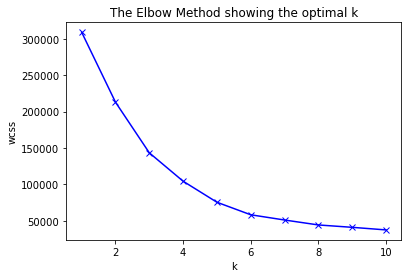

In [111]:
# k means determine k
wcss = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++')
    kmeanModel.fit(X)
    wcss.append(kmeanModel.inertia_)
print(wcss)

# Plot the elbow
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('wcss')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Training the K Means Model on the dataset

In [112]:
kmeanModel = KMeans(n_clusters=6, init='k-means++')
y_kmeans = kmeanModel.fit_predict(X) 
# fit_predict method not only fits the model but also predicts the dependent variable forming 6 clusters taking values 0,1,2,3,4,5

In [113]:
y_kmeans

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2, 0, 4, 5,
       4, 0, 2, 5, 5, 5, 2, 5, 5, 2, 2, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 5,
       2, 2, 5, 5, 2, 2, 2, 2, 2, 5, 2, 5, 5, 2, 2, 5, 2, 2, 5, 2, 2, 5,
       5, 2, 2, 5, 2, 5, 5, 5, 2, 5, 2, 5, 5, 2, 2, 5, 2, 5, 2, 2, 2, 2,
       2, 5, 5, 5, 5, 5, 2, 2, 2, 2, 5, 5, 5, 1, 5, 1, 3, 1, 3, 1, 3, 1,
       5, 1, 3, 1, 3, 1, 3, 1, 3, 1, 5, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [114]:
y_kmeans.shape

(200,)

In [115]:
y_kmeans_ser = pd.Series(y_kmeans)
y_kmeans_ser

0      4
1      0
2      4
3      0
4      4
      ..
195    1
196    3
197    1
198    3
199    1
Length: 200, dtype: int32

In [116]:
data = pd.concat([dataset,y_kmeans_ser],axis=1,sort=False)

In [117]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
5,6,Female,22,17,76,0
6,7,Female,35,18,6,4
7,8,Female,23,18,94,0
8,9,Male,64,19,3,4
9,10,Female,30,19,72,0


In [118]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 0],
      dtype='object')

In [119]:
data.rename(columns={0:'Cluster'},inplace=True)

In [120]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
5,6,Female,22,17,76,0
6,7,Female,35,18,6,4
7,8,Female,23,18,94,0
8,9,Male,64,19,3,4
9,10,Female,30,19,72,0


In [121]:
data['Cluster'].unique() # shows the clusters

array([4, 0, 2, 5, 1, 3])